In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import compute_charge_dist as fz

import time

%matplotlib inline

G0 = 1.7

#grain_type = "carbonaceous"
grain_type = "silicate"

grain_size = 5
pcent      = 1

# Desktop
#save_dir = "/home/jcibanezm/codes/run/Silcc/CF_Prabesh/ChargeDist"
#save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/CR"
save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

# Laptop
#save_dir = "/Users/juan/codes/run/Silcc/CF_Prabesh/ChargeDist"

#filename = "ChargeDist_CF_%sgrains_%iAA_.pkl"%(grain_type, grain_size)
#filename = "fz_%.3iAA_%s_CR_True.pkl"%(grain_size, grain_type) 
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

# Read a pickle file.

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_small = pickle.load(pkl_file)
pkl_file.close

outfile = open('/home/jcibanezm/codes/DustAnalysis/Charge/PaperFigures_DustCharge/cell_mass_small.pkl', 'rb')
cell_mass_small = pickle.load(outfile)
outfile.close()

########################################################################################
grain_size = 100
#grain_type = "carbonaceous"

# Desktop
#save_dir = "/home/jcibanezm/codes/run/Silcc/CF_Prabesh/ChargeDist"
#save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/CR"
save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

# Laptop
#save_dir = "/Users/juan/codes/run/Silcc/CF_Prabesh/ChargeDist"

#filename = "ChargeDist_CF_%sgrains_%iAA.pkl"%(grain_type, grain_size)
#filename = "fz_%.3iAA_%s_CR_True.pkl"%(grain_size, grain_type) 
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

# Read a pickle file.

pkl_file   = open("%s/%s"%(save_dir, filename), "rb")
cdist_int  = pickle.load(pkl_file)
pkl_file.close


########################################################################################
grain_size =  1000
#grain_type = "carbonaceous"

pcent = 0.1

# Desktop
#save_dir = "/home/jcibanezm/codes/run/Silcc/CF_Prabesh/ChargeDist"
# Laptop
#save_dir = "/Users/juan/codes/run/Silcc/CF_Prabesh/ChargeDist"
save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "ChargeDist_CF_%sgrains_%iAA.pkl"%(grain_type, grain_size)
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

# Read a pickle file.

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_large = pickle.load(pkl_file)
pkl_file.close


Loading the library to compute the charge distribution of dust grains.


<function close>

In [58]:
#grain_type = "carbonaceous"

#cist = "small"
#cdist = cdist_small
#grain_size = 5

#dist = "int"
#cdist = cdist_int
#grain_size = 100

dist = "large"
cdist = cdist_large
grain_size = 1000


In [59]:
too_high = np.where(cdist["nH"] > 2.0e4)

ii = 0
for key in cdist.keys():
    #arrs.append(0)
    if key!="Qabs_mean" and key!="grain_size" and key!="grain_type" and key!="MPI" and key!="fdist" and key!="info" and key!="zminmax" and key!="ZZ":
        #print(key)
        cdist[key] = np.delete(cdist[key], too_high)
    #ii +=1
    

In [60]:
Qabs       = fz.get_QabsTable(grain_type, grain_size)
Qabs_mean  = fz.get_avgQabs(Qabs, 1.7)

Zpar        = (cdist["G"]+cdist["G_CR"]) * np.sqrt(cdist["temp"]) / (cdist["new_ne"])
Zpar_arr    = np.linspace(np.min(Zpar), np.max(Zpar), num=100)
zpar_max    = np.max(Zpar)
Zpar_scaled = Zpar_arr/zpar_max*np.max(cdist["zmean"])


0.23


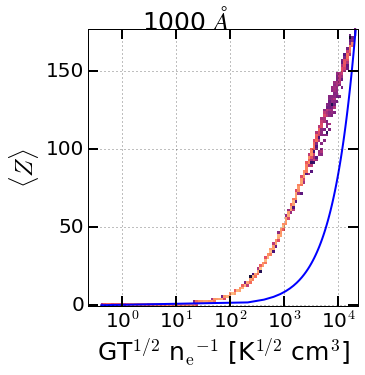

In [62]:
xsize = 5
ysize = 5

nfigs_x = 1
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.156
#wpad = 0.2

if dist == "small":
    wpad = 0.245
elif dist=="int":
    wpad = 0.2
else:
    wpad = 0.23
    
print(wpad)
    
xs_panel = 0.75 / nfigs_x 
ys_panel = 0.77 / nfigs_y 

total_mass = np.sum(cdist["cell_mass"])

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################


ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

#ax.hist2d(Zpar, cdist["zmean"], bins=50, norm=LogNorm(), cmap="magma", weights=cdist["cell_mass"]/total_mass, vmin=1.0e-6, vmax=0.1)
ax.hist2d(np.log10(Zpar), cdist["zmean"], bins=100, norm=LogNorm(), cmap="magma", weights=cdist["cell_mass"]/total_mass, vmin=1.0e-6, vmax=0.1)

#ax.plot([np.min(Zpar), np.max(Zpar)], [np.min(Zpar_scaled), np.max(Zpar_scaled)], "-b", linewidth=2)
ax.plot(np.log10(Zpar_arr), Zpar_scaled, "-b", linewidth=2)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$\\langle Q_{abs} \\rangle $G$_{tot}$T$^{0.5}$ n$_{e}^{-1}$", fontsize=18)
#ax.set_xlabel("GT$^{1/2}$ n$_{e}^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=25)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=25)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)

ax.grid("on")

#ax.set_xlim(0.24, 23634.9)
ax.set_xlim(np.log10(0.24), np.log10(23634.9))
ax.set_ylim(np.min(cdist["zmean"]), np.max(cdist["zmean"]))

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

fig.suptitle("%i $\\AA$"%grain_size, fontsize=25, y=0.988)

fig.show()

savedir = "/home/jcibanezm/codes/DustAnalysis/Charge/Figures/ChargingParameter"
fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Figure_5_%iAA_%s_DraineParameters_logscale.pdf"%(grain_size, grain_type), format="pdf")


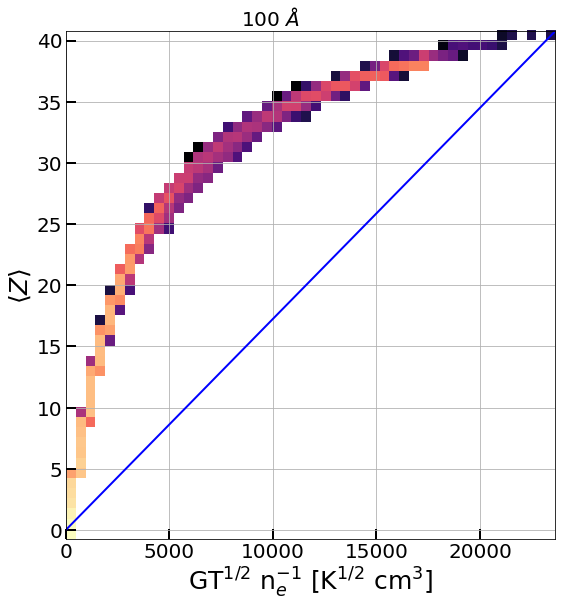

In [42]:
xsize = 8
ysize = 8.4

nfigs_x = 1
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.10
wpad = 0.145

xs_panel = 0.85 / nfigs_x 
ys_panel = 0.84 / nfigs_y 

total_mass = np.sum(cdist["cell_mass"])

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################


ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(Zpar, cdist["zmean"], bins=50, norm=LogNorm(), cmap="magma", weights=cdist["cell_mass"]/total_mass, vmin=1.0e-6, vmax=0.1)
#ax.hist2d(np.log10(Zpar), cdist["zmean"], bins=50, norm=LogNorm(), cmap="magma", weights=cdist["cell_mass"]/total_mass, vmin=1.0e-6, vmax=0.1)

ax.plot([np.min(Zpar), np.max(Zpar)], [np.min(Zpar_scaled), np.max(Zpar_scaled)], "-b", linewidth=2)
#ax.plot(np.log10(Zpar_arr), Zpar_scaled, "-b", linewidth=2)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$\\langle Q_{abs} \\rangle $G$_{tot}$T$^{0.5}$ n$_{e}^{-1}$", fontsize=18)
ax.set_xlabel("GT$^{1/2}$ n$_{e}^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=25)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)

ax.grid("on")

ax.set_xlim(0.24, 23634.9)
#ax.set_xlim(np.log10(0.24), np.log10(23634.9))
ax.set_ylim(np.min(cdist["zmean"]), np.max(cdist["zmean"]))

#ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

fig.suptitle("%i $\\AA$"%grain_size, fontsize=20, y=0.98)

fig.show()

savedir = "/home/jcibanezm/codes/DustAnalysis/Charge/Figures/ChargingParameter"
fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Figure_5_%iAA_%s_DraineParameters.pdf"%(grain_size, grain_type), format="pdf")


---